# Calculate PMI and Create Plots
     
PMI values for the reference sets were pre-calculated using the script `calc_pmi` from the `Python_Scripts` folder. The larger datasets (Enamine and ChEMBL NPs) were split in smaller chunks with a custom tool ( `rcsv_split` and its counter part `rcsv_combine`, not part of this repo) and run in parallel for faster calculations.

The same reference sets as for the descriptor calculations were used.

*DrugBank:*
```
$ calc_pmi drugbank_5.1.8_appr_inv_full.tsv DRUGBANK_ID -n 100 -t 30
Namespace(in_file='drugbank_5.1.8_appr_inv_full.tsv', id_col='DRUGBANK_ID', t=30, v=False, n=100)
  In:     4866  Out:     3750  Failed:      0  UndefStereo:    912  Timeout:    204   done.

$ mv drugbank_5_pmi.tsv drugbank_5.1.8_appr_inv_full_pmi.tsv
```

*Enamine 50k Subset:*
```
$ rcsv_split enamine_adv_full_sample_50k_desc.tsv 10
Counting lines...
50000 lines in enamine_adv_full_sample_50k_desc.tsv, writing 5001 lines per chunk (10 chunks). The last chunk may have less...

$ for jobid in {01..10}; do echo "Starting job $jobid"; calc_pmi enamine_adv_full_sample_50k_desc-0$jobid.tsv idnumber -n 100 -t 30 -v >> pmi.txt & sleep 5; done

$ grep -F done pmi.txt | sort
(enamine_adv_full_sample_50k_desc-001)  In:     5001  Out:     4169  Failed:      0  UndefStereo:    832  Timeout:      0   done.
(enamine_adv_full_sample_50k_desc-002)  In:     5001  Out:     4198  Failed:      0  UndefStereo:    803  Timeout:      0   done.
(enamine_adv_full_sample_50k_desc-003)  In:     5001  Out:     4177  Failed:      0  UndefStereo:    823  Timeout:      1   done.
(enamine_adv_full_sample_50k_desc-004)  In:     5001  Out:     4187  Failed:      0  UndefStereo:    814  Timeout:      0   done.
(enamine_adv_full_sample_50k_desc-005)  In:     5001  Out:     4157  Failed:      0  UndefStereo:    843  Timeout:      1   done.
(enamine_adv_full_sample_50k_desc-006)  In:     5001  Out:     4220  Failed:      0  UndefStereo:    780  Timeout:      1   done.
(enamine_adv_full_sample_50k_desc-007)  In:     5001  Out:     4191  Failed:      0  UndefStereo:    808  Timeout:      2   done.
(enamine_adv_full_sample_50k_desc-008)  In:     5001  Out:     4233  Failed:      0  UndefStereo:    766  Timeout:      2   done.
(enamine_adv_full_sample_50k_desc-009)  In:     5001  Out:     4178  Failed:      0  UndefStereo:    822  Timeout:      1   done.
(enamine_adv_full_sample_50k_desc-010)  In:     4991  Out:     4237  Failed:      0  UndefStereo:    751  Timeout:      3   done.

$ rcsv_combine "enamine_adv_full_sample_50k_desc-0*_pmi.tsv" enamine_adv_full_sample_50k_pmi.tsv
41947 lines from 10 files written to enamine_adv_full_sample_50k_pmi.tsv.
```

*ChEMBL NPs:*
```
$ rcsv_split chembl_30_np_full_nocanon_deglyco.tsv 20
Counting lines...
45679 lines in chembl_30_np_full_nocanon_deglyco.tsv, writing 2284 lines per chunk (20 chunks). The last chunk may have less...

$ for jobid in {01..20}; do echo "Starting job $jobid"; calc_pmi chembl_30_np_full_nocanon_deglyco-0$jobid.tsv chembl_id -n 100 -t 30 -v >> pmi.txt & sleep 5; done

❯ grep -F done pmi.txt | sort
(chembl_30_np_full_nocanon_deglyco-001)  In:     2284  Out:     1943  Failed:      0  UndefStereo:    122  Timeout:    219   done.
(chembl_30_np_full_nocanon_deglyco-002)  In:     2284  Out:     1645  Failed:      0  UndefStereo:    151  Timeout:    488   done.
(chembl_30_np_full_nocanon_deglyco-003)  In:     2284  Out:     1773  Failed:      0  UndefStereo:    167  Timeout:    344   done.
(chembl_30_np_full_nocanon_deglyco-004)  In:     2284  Out:     1750  Failed:      0  UndefStereo:    171  Timeout:    363   done.
(chembl_30_np_full_nocanon_deglyco-005)  In:     2284  Out:     1783  Failed:      0  UndefStereo:    152  Timeout:    349   done.
(chembl_30_np_full_nocanon_deglyco-006)  In:     2284  Out:     1753  Failed:      0  UndefStereo:    244  Timeout:    287   done.
(chembl_30_np_full_nocanon_deglyco-007)  In:     2284  Out:     1642  Failed:      0  UndefStereo:    343  Timeout:    299   done.
(chembl_30_np_full_nocanon_deglyco-008)  In:     2284  Out:     1764  Failed:      0  UndefStereo:    253  Timeout:    267   done.
(chembl_30_np_full_nocanon_deglyco-009)  In:     2284  Out:     1817  Failed:      0  UndefStereo:    243  Timeout:    224   done.
(chembl_30_np_full_nocanon_deglyco-010)  In:     2284  Out:     1763  Failed:      0  UndefStereo:    233  Timeout:    288   done.
(chembl_30_np_full_nocanon_deglyco-011)  In:     2284  Out:     1788  Failed:      0  UndefStereo:    222  Timeout:    274   done.
(chembl_30_np_full_nocanon_deglyco-012)  In:     2284  Out:     1657  Failed:      0  UndefStereo:    320  Timeout:    307   done.
(chembl_30_np_full_nocanon_deglyco-013)  In:     2284  Out:     1813  Failed:      0  UndefStereo:    281  Timeout:    190   done.
(chembl_30_np_full_nocanon_deglyco-014)  In:     2284  Out:     1695  Failed:      0  UndefStereo:    283  Timeout:    306   done.
(chembl_30_np_full_nocanon_deglyco-015)  In:     2284  Out:     1577  Failed:      0  UndefStereo:    247  Timeout:    460   done.
(chembl_30_np_full_nocanon_deglyco-016)  In:     2284  Out:     1778  Failed:      0  UndefStereo:    265  Timeout:    241   done.
(chembl_30_np_full_nocanon_deglyco-017)  In:     2284  Out:     1721  Failed:      0  UndefStereo:    250  Timeout:    313   done.
(chembl_30_np_full_nocanon_deglyco-018)  In:     2284  Out:     1816  Failed:      0  UndefStereo:    208  Timeout:    260   done.
(chembl_30_np_full_nocanon_deglyco-019)  In:     2284  Out:     1813  Failed:      0  UndefStereo:    213  Timeout:    258   done.
(chembl_30_np_full_nocanon_deglyco-020)  In:     2283  Out:     1707  Failed:      0  UndefStereo:    273  Timeout:    303   done.

$ rcsv_combine "chembl_30_np_full_nocanon_deglyco-0*_pmi.tsv" chembl_30_np_full_nocanon_deglyco_pmi.tsv
34998 lines from 20 files written to chembl_30_np_full_nocanon_deglyco_pmi.tsv.
```

In [1]:
%reload_ext autoreload
%autoreload 2
def warn(*args, **kwargs):
    pass  # to silence scikit-learn warnings

import warnings
warnings.filterwarnings('ignore')
warnings.warn = warn

# Type hints
from typing import Iterable, List, Set, Dict, Union, Optional

import os, gc
import time

import pandas as pd
import numpy as np
# import scipy.stats as st
from sklearn.neighbors import KernelDensity

from rdkit import DataStructs
from rdkit.Chem import AllChem as Chem
from rdkit.Chem import Descriptors as Desc
from rdkit.Chem import rdMolDescriptors as rdMolDesc
# from rdkit.Chem import Draw
# from rdkit.Chem.Draw import IPythonConsole

import matplotlib.pyplot as plt
import seaborn as sns
from tqdm.notebook import tqdm
tqdm.pandas()

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

# Project-local Imports
from jupy_tools import plt_style, pmi
from jupy_tools import utils as u, mol_view as mv
from jupy_tools.utils import info

measure_runtime = u.MeasureRuntime()
u.timestamp()

Timestamp: 25-May-2023 13:26:12


## Functions

In [2]:
bandwidth = 0.02
contour_levels = 10
contour_line_width = 2.0

def pmi_plot_contour_overview(df):
    plt.figure(figsize=(15, 14));
    fig, ax = plt.subplots();
    leg_dict = {}
    leg_list = ["Enamine", "DrugBank", "ChEMBL NP", config["name"]]
    plot_order = ["DrugBank", "ChEMBL NP", "Enamine"]
    for ds in plot_order:
        # tmp1 = df.query(f"""DataSet == '{ds}'""").sample(n=2500).copy().reset_index(drop=True)
        tmp1 = df.query(f"""DataSet == '{ds}'""").copy().reset_index(drop=True)
        x = tmp1["PMI1"]
        y = tmp1["PMI2"]

        # if ds == "Enamine":
        #     xmin, xmax = 0, 0.5
        #     ymin, ymax = 0.75, 1
        # else:
        xmin, xmax = 0, 1
        ymin, ymax = 0.5, 1

        # Peform the kernel density estimate
        xx, yy = np.mgrid[xmin:xmax:200j, ymin:ymax:200j]
        positions = np.vstack([xx.ravel(), yy.ravel()]).T
        values = np.vstack([x, y]).T
        kde = KernelDensity(
            algorithm="kd_tree",
            kernel='gaussian', bandwidth=bandwidth,
        ).fit(values)
        f = np.reshape(
            np.exp(kde.score_samples(positions)), 
            xx.shape
        )

        # Contour plot
        cntr = ax.contour(
            xx, yy, f, colors=cmap[ds], levels=contour_levels, label=ds, linestyles="-", linewidths=contour_line_width
        );
        leg_elem,_ = cntr.legend_elements()
        leg_dict[ds] = leg_elem[contour_levels-1]
        # scatter = ax.plot(x, y, 'o', markersize=4, alpha=0.7, color=cmap[ds])

    # Overview plot for the internal DataSet
    tmp2 = df.query(f"""DataSet == '{config["name"]}'""")
    x = tmp2["PMI1"]
    y = tmp2["PMI2"]
    scatter = ax.plot(x, y, 'o', markersize=10, color=cmap[config["name"]])
    leg_dict[config["name"]] = scatter[0]

    plt.plot([0.0, 0.5, 1.0], [1.0, 0.5, 1.0], color="k", linestyle="-")
    plt.xlim((0, 1))
    plt.ylim(0.5, 1)
    plt.xlabel("PMI1");
    plt.ylabel("PMI2");
    leg_elements = [leg_dict[x] for x in leg_list]
    plt.legend(leg_elements, leg_list);
    plt.title("PMI Plot");
    if USE_SMALLEST_REF_SET:
        out_fn = f"{config['dataset']}/output/pmi_contour_ref_sample"
    else:
        out_fn = f"{config['dataset']}/output/pmi_contour_ref_all"
    plt.savefig(f"{out_fn}.png");
    plt.savefig(f"{out_fn}.svg");

def pmi_plot_scatter_overview(df):
    plt.figure(figsize=(15, 14));
    fig, ax = plt.subplots();
    leg_dict = {}
    leg_list = ["Enamine", "DrugBank", "ChEMBL NP", config["name"]]
    plot_order = ["ChEMBL NP", "DrugBank", "Enamine"]
    for ds in plot_order:
        tmp1 = df.query(f"""DataSet == '{ds}'""").sample(n=3400).copy().reset_index(drop=True)
        # tmp1 = df.query(f"""DataSet == '{ds}'""").copy().reset_index(drop=True)
        x = tmp1["PMI1"]
        y = tmp1["PMI2"]
        scatter = ax.plot(x, y, 'o', markersize=4, alpha=0.7, color=cmap[ds])
        leg_dict[ds] = scatter[0]


    # Overview plot for the internal DataSet
    tmp2 = df.query(f"""DataSet == '{config["name"]}'""")
    x = tmp2["PMI1"]
    y = tmp2["PMI2"]
    scatter = ax.plot(x, y, 'o', markersize=10, color=cmap[config["name"]])
    leg_dict[config["name"]] = scatter[0]

    plt.plot([0.0, 0.5, 1.0], [1.0, 0.5, 1.0], color="k", linestyle="-")
    plt.xlim((0, 1))
    plt.ylim(0.5, 1)
    plt.xlabel("PMI1");
    plt.ylabel("PMI2");
    leg_elements = [leg_dict[x] for x in leg_list]
    plt.legend(leg_elements, leg_list);
    plt.title("PMI Plot (sampled data)");
    out_fn = f"{config['dataset']}/output/pmi_scatter_ref_sample"
    plt.savefig(f"{out_fn}.png");
    plt.savefig(f"{out_fn}.svg");

def pmi_plot_contour_per_class(df):
    plt.figure(figsize=(15, 14));
    fig, ax = plt.subplots();
    leg_dict = {}
    leg_list = []
    if config.get("show_reference_sets", True):
        leg_list = ["Enamine", "DrugBank", "ChEMBL NP"]
        plot_order = ["DrugBank", "ChEMBL NP", "Enamine"]
        for ds in plot_order:
            # tmp1 = df.query(f"""DataSet == '{ds}'""").sample(n=2500).copy().reset_index(drop=True)
            tmp1 = df.query(f"""DataSet == '{ds}'""").copy().reset_index(drop=True)
            x = tmp1["PMI1"]
            y = tmp1["PMI2"]

            if ds == "Enamine":
                xmin, xmax = 0, 0.5
                ymin, ymax = 0.75, 1
            else:
                xmin, xmax = 0, 1
                ymin, ymax = 0.5, 1

            # Peform the kernel density estimate
            xx, yy = np.mgrid[xmin:xmax:200j, ymin:ymax:200j]
            positions = np.vstack([xx.ravel(), yy.ravel()]).T
            values = np.vstack([x, y]).T
            kde = KernelDensity(
                algorithm="kd_tree",
                kernel='gaussian', bandwidth=bandwidth,
            ).fit(values)
            f = np.reshape(
                np.exp(kde.score_samples(positions)), 
                xx.shape
            )

            # Contour plot
            cntr = ax.contour(
                xx, yy, f, colors=cmap[ds], levels=contour_levels, label=ds, linestyles="-", linewidths=contour_line_width
            );
            leg_elem,_ = cntr.legend_elements()
            leg_dict[ds] = leg_elem[contour_levels-1]
            # scatter = ax.plot(x, y, 'o', markersize=4, alpha=0.7, color=cmap[ds])

    # Per-class plots for the internal DataSet
    markers = ["o", "^", "s", "p", "P", "*", "X", "<", ">", "D", "v"]
    assert len(markers) == len(set(markers)), "Markers are not unique."
    tmp2 = df.query(f"""DataSet == '{config["name"]}'""")
    cpd_classes = list(sorted(tmp2["CpdClass"].unique()))
    assert len(cpd_classes) <= len(markers), "Not enough markers for the number of classes."
    class_marker_colors = config.get("per_class_colors", None)
    for idx, cc in enumerate(cpd_classes):
        tmp_cc = tmp2.query(f"""CpdClass == '{cc}'""")
        x = tmp_cc["PMI1"]
        y = tmp_cc["PMI2"]
        if class_marker_colors is None:
            scatter = ax.plot(x, y, markers[idx], markersize=10, color=cmap[config["name"]])
        else:
            scatter = ax.plot(x, y, markers[idx], markersize=10, color=class_marker_colors[idx])
        leg_list.append(cc)
        leg_dict[cc] = scatter[0]

    plt.plot([0.0, 0.5, 1.0], [1.0, 0.5, 1.0], color="k", linestyle="-")
    plt.xlim((0, 1))
    plt.ylim(0.5, 1)
    plt.xlabel("PMI1");
    plt.ylabel("PMI2");
    leg_elements = [leg_dict[x] for x in leg_list]
    plt.legend(leg_elements, leg_list);
    plt.title("PMI Plot (per class)");
    if USE_SMALLEST_REF_SET:
        out_fn = f"{config['dataset']}/output/pmi_per_class_ref_sample"
    else:
        out_fn = f"{config['dataset']}/output/pmi_per_class_ref_all"
    plt.savefig(f"{out_fn}.png");
    plt.savefig(f"{out_fn}.svg");


## Configuration

In [3]:
config = {
    "dataset": "pmi",
    "name": "PNPs",
    "id_col": "ENSO_Id",  # this key is optional
    "extra_columns": [],
    "has_cpd_ids": False,
    "per_class_plots": True,
}

In [4]:
RECALC_PMI = False  # Recalculate the PMI values of the internal data set (SLOW).
USE_SMALLEST_REF_SET = False  # Sample all reference sets down to the size of the smallest one.

DATA_EN = "enamine_adv_full"
DATA_DB = "drugbank_5.1.8_appr_inv_full"
DATA_NP = "chembl_30_np_full_nocanon_deglyco"

cmap = {"Enamine": "#1f77b4", "DrugBank": "#ff7f0e", "ChEMBL NP": "#2ca02c", config["name"]: "#000000"}

os.makedirs(f'{config["dataset"]}/output', exist_ok=True)

## Loading Data Sets

In [5]:
df_int = u.read_tsv(f"{config['dataset']}/input/smiles_all.tsv")

if config["has_cpd_ids"]:
    # Merge structure Smiles by Compound_Id
    config["id_col"] = "Compound_Id"
    df_comas = u.read_tsv("/home/pahl/comas/share/comas_smiles.tsv")
    num_cpds_1 = len(df_int)
    df_int = pd.merge(df_int, df_comas, on="Compound_Id", how="left")
    num_cpds_2 = len(df_int)
    assert num_cpds_1 == num_cpds_2, f"Only {num_cpds_2} out of {num_cpds_2} compounds were found in the COMAS database."
if config.get("has_salts", False):
    print("Standardizing structures...")
    num_cpds_1 = len(df_int)
    df_int = u.calc_from_smiles(df_int, "Smiles_Stand", u.standardize_mol, filter_nans=False)
    df_nan = df_int[df_int["Smiles_Stand"].isna()]
    df_int = u.remove_nans(df_int, "Smiles_Stand")
    num_cpds_2 = len(df_int)
    if num_cpds_1 != num_cpds_2:
        print(f"Only {num_cpds_2} out of {num_cpds_1} compounds could be standardized.")
        df_nan
        # raise Exception("Structure standardization failed.")
    df_int = df_int.drop("Smiles", axis=1)
    df_int = df_int.rename(columns={'Smiles_Stand': 'Smiles'})
if "id_col" not in config:
    config["id_col"] = "Cpd_Id"
    df_int["Cpd_Id"] = df_int.index + 1

# The reference data sets already contain the PMI data
# Generated by the `calc_pmi.py` script
df_en = u.read_tsv(f"input/{DATA_EN}_sample_50k_pmi.tsv")
df_db = u.read_tsv(f"input/{DATA_DB}_pmi.tsv")
df_np = u.read_tsv(f"input/{DATA_NP}_pmi.tsv")

datasets = {"Enamine": df_en, "DrugBank": df_db, "ChEMBL NP": df_np}
id_cols = {"Enamine": "idnumber", "DrugBank": "DRUGBANK_ID", "ChEMBL NP": "chembl_id", config["name"]: config["id_col"]}

read_tsv                           : [     153 /   3 ] ( CpdClass, ENSO_Id, Smiles )
read_tsv                           : [   41947 /   5 ] ( idnumber, PMI1, PMI2, Duration, Smiles )
read_tsv                           : [    3750 /   5 ] ( DRUGBANK_ID, PMI1, PMI2, Duration, Smiles )
read_tsv                           : [   34998 /   5 ] ( chembl_id, PMI1, PMI2, Duration, Smiles )


## Write Structure Overview File

In [6]:
mv.write_mol_grid(
    df_int, title=config["name"], id_col=config["id_col"], fn=f"{config['dataset']}/output/mol_grid.html",
    truncate=20
)

drop_cols                          : [     153 /   3 ]  1 columns removed. ( CpdClass, ENSO_Id, Mol )


## Adding PMI to Internal Data (Slow)

Molecules are excluded from the PMI calculation when they have either
  - more than one undefined stereocenter, or
  - one or more defined stereocenters and at least one undefined stereocenter
    (creating diastereomers)

In [7]:
if RECALC_PMI:
    num_cpds_1 = len(df_int)
    df_int = df_int.reset_index(drop=True)
    df_int = u.calc_from_smiles(df_int, "Stereo", pmi.get_stereo_counts)  # Stereo: (num_spec, num_unspec, is_diastereomer)
    df_int[["NumSpec", "NumUnspec", "IsDiastereomer"]] = pd.DataFrame(df_int['Stereo'].tolist(), index=df_int.index)
    df_int = df_int.drop("Stereo", axis=1)

    df_stereo_fail = df_int[df_int["IsDiastereomer"]].copy()
    if len(df_stereo_fail) > 0:
        print(f"{len(df_stereo_fail)} compounds failed the stereo rules. See `molgrid_stereo.html` for details.")
        df_stereo_fail = df_stereo_fail.sort_values(["NumUnspec"], ascending=False)
        mv.write_mol_grid(
            df_stereo_fail, title=f'{config["name"]}_stereo', id_col=config["id_col"], fn=f"{config['dataset']}/output/mol_grid_stereo.html",
            truncate=20, interactive=True
        )
    df_int = df_int[~df_int["IsDiastereomer"]].copy()
    df_int = df_int.reset_index(drop=True)
    num_cpds_2 = len(df_int)
    if num_cpds_1 != num_cpds_2:
        print(f"{num_cpds_1-num_cpds_2} compounds were removed because of undefined stereochemistry.")

    u.MIN_NUM_RECS_PROGRESS = 100
    df_int = u.calc_from_smiles(df_int, "PMI", lambda x: pmi.calc_pmi(x, n_conformers=15, avg=3))
    # datasets[config["name"]] = df_int
    u.MIN_NUM_RECS_PROGRESS = 500

    df_int[['PMI1', 'PMI2']] = pd.DataFrame(df_int['PMI'].tolist(), index=df_int.index)
    df_int = df_int.drop("PMI", axis=1)
    u.write_tsv(df_int, f"{config['dataset']}/output/pmi.tsv")

## Generate One Data Set for Plotting
The internal data is read from disk at the top of this cell

In [8]:
if USE_SMALLEST_REF_SET:
    # Use the same size for all reference sets:
    len_smallest_ref_set = len(df_db)
    print(f"Sampling all reference sets down to {len_smallest_ref_set} compounds.")

df_int = u.read_tsv(f"{config['dataset']}/output/pmi.tsv")
datasets[config["name"]] = df_int
tmp_list = []
for ds in datasets:
    if USE_SMALLEST_REF_SET:
        if len(datasets[ds]) > len_smallest_ref_set:
            tmp = datasets[ds].sample(n=len_smallest_ref_set).copy()
        else:
            tmp = datasets[ds].copy()
    else:
        tmp = datasets[ds].copy()
    tmp["DataSet"] = ds
    tmp = tmp.rename(columns={id_cols[ds]: "Cpd_Id"})
    tmp_list.append(tmp)

cols = ["Cpd_Id", "DataSet", "PMI1", "PMI2", "Duration"]
cols.extend(config["extra_columns"])
if config["per_class_plots"]:
    cols.append("CpdClass")
df_all = pd.concat(tmp_list)[cols]
df_all = df_all.reset_index(drop=True)
del tmp_list

read_tsv                           : [     153 /   8 ] ( CpdClass, ENSO_Id, Smiles, NumSpec, NumUnspec, IsDiastereomer, PMI1, PMI2 )


## Analysis
### Plots Calculation Time of Reference Sets

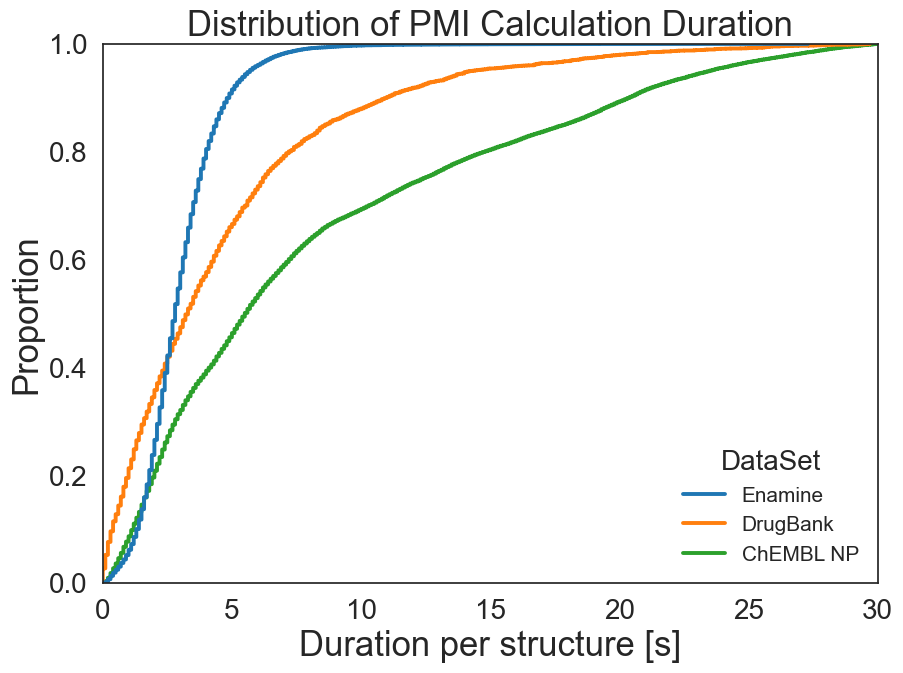

In [9]:
tmp = df_all.query(f"""DataSet != "{config['name']}" """)
plt.figure(figsize=(10, 7))
sns.ecdfplot(data=tmp, x="Duration", stat="proportion", hue="DataSet", palette=cmap)
plt.xlabel("Duration per structure [s]")
plt.xlim(0, 30);
# plt.legend();
plt.title(f"Distribution of PMI Calculation Duration")
plt.savefig(f"{config['dataset']}/output/ecdf_duration.png");
plt.savefig(f"{config['dataset']}/output/ecdf_duration.svg");

### PMI Overview Plot

<Figure size 1500x1400 with 0 Axes>

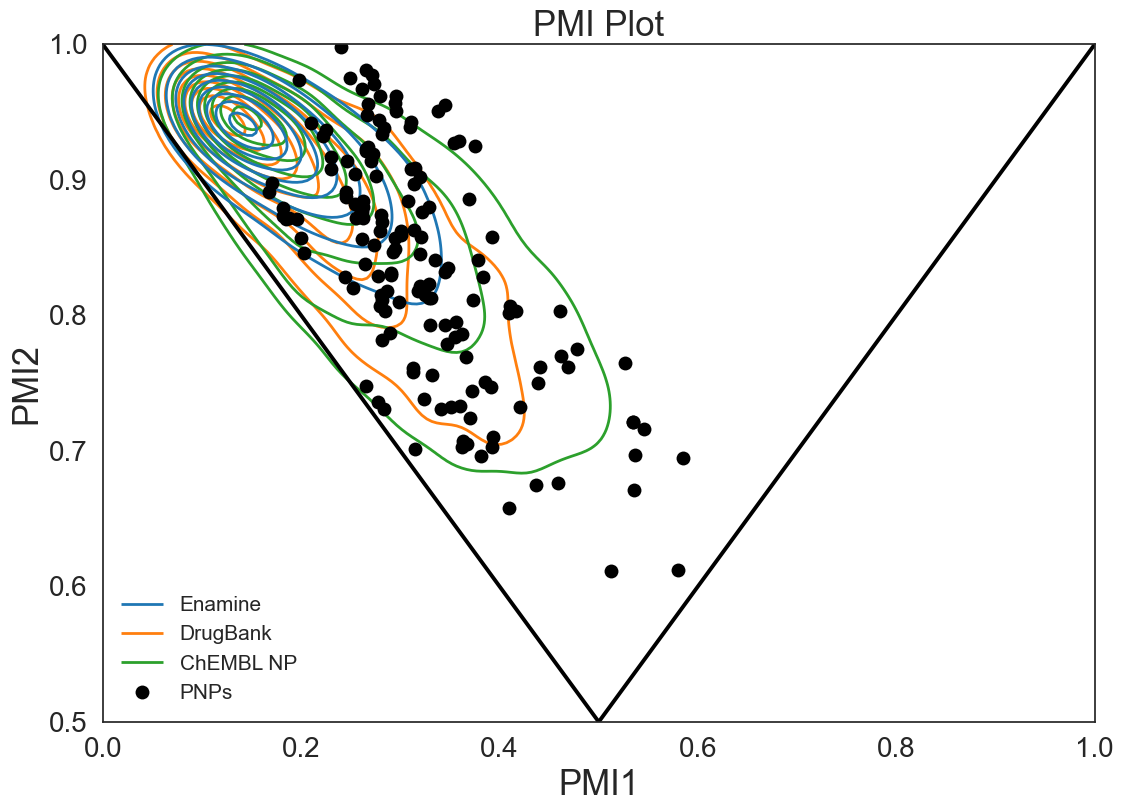

In [10]:
if config.get("overview_plots", True):
    pmi_plot_contour_overview(df_all)

### PMI Scatter Overview

<Figure size 1500x1400 with 0 Axes>

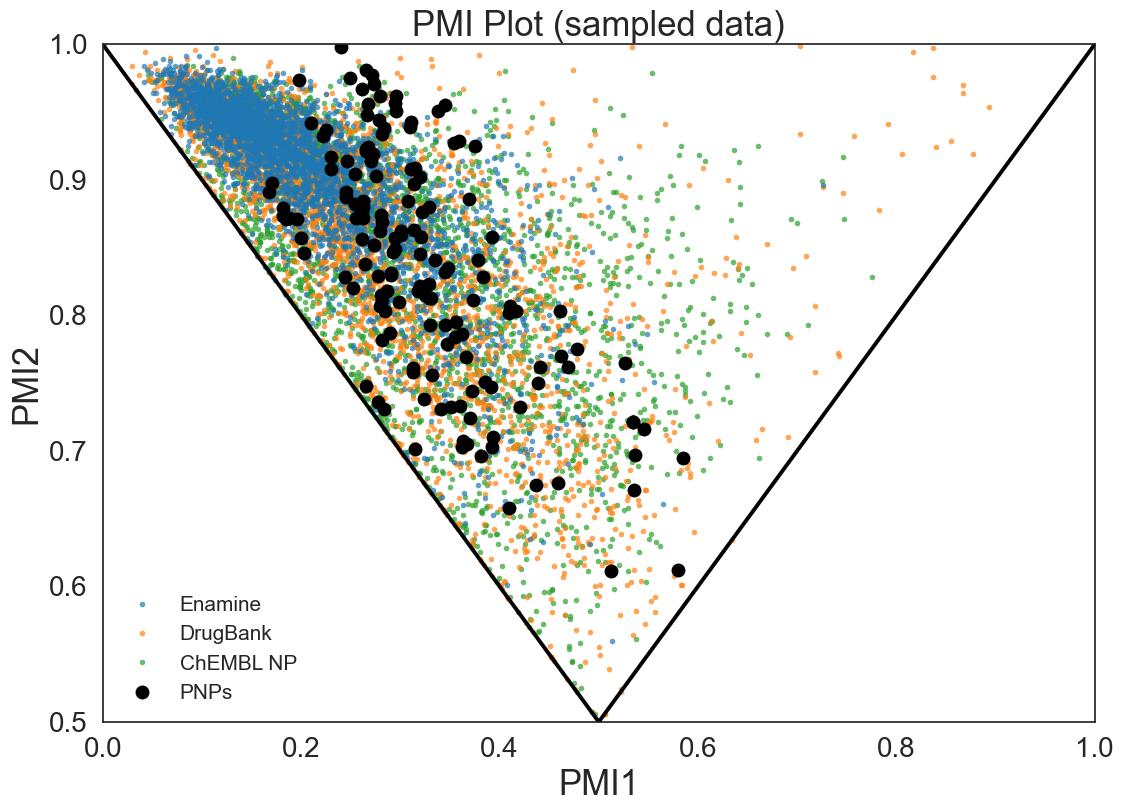

In [11]:
if config.get("overview_plots", True):
    pmi_plot_scatter_overview(df_all)

### PMI Per Class Plot

<Figure size 1500x1400 with 0 Axes>

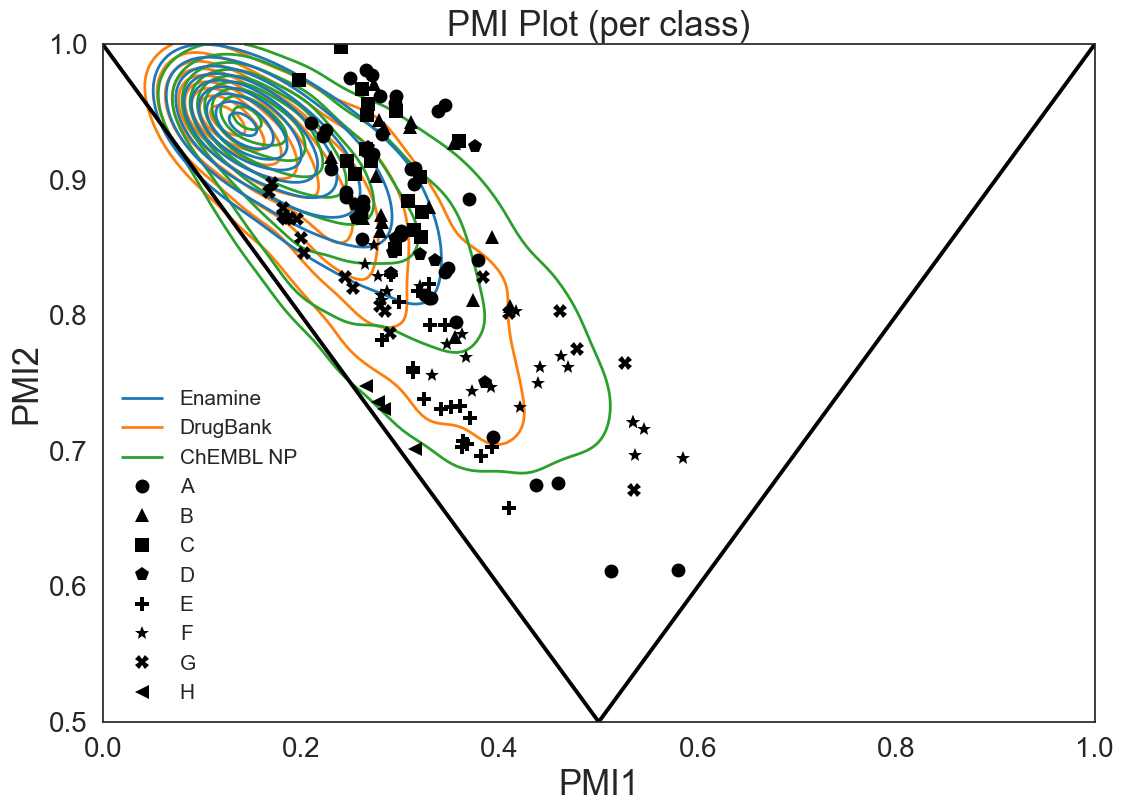

In [12]:
if config["per_class_plots"]:
    pmi_plot_contour_per_class(df_all)

In [13]:
measure_runtime.elapsed()

Runtime: 3.4 min
